# SVMとロジスティック回帰の比較

* 勉強会でSVMとロジスティック回帰の違いが話題になった。
* ここではサイズの違いが2つのモデルの結果に影響を与えるのかを見てみたい。

In [1]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# from mlxtend.plotting import plot_decision_regions

%matplotlib inline
sns.set_style("darkgrid")

~~* グラフの描画には[mlxtend](https://github.com/rasbt/mlxtend)を用いている。このライブラリの作者
はPython機械学習プログラミングの著者の方。~~
* 上記だと、xlim,ylimを設定した際に思う通りにグラフをかけなかったため、同じ作者の[こちら](https://github.com/rasbt/python-machine-learning-book/blob/master/code/optional-py-scripts/ch03.py)を参考にした。

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1_min = -5
    x1_max = 15
    x2_min = -5
    x2_max = 15
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())
    plt.xlim(-5, 15)
    plt.ylim(-5, 15)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

* 今回は`(0,0)`を中心とするデータAと、`(10,10)`を中心とするデータBの2つを、SVMとロジスティック回帰で分類し、決定境界を引いて見る。
* ただしBは、Aと同じサンプルサイズの場合と、それより小さい場合の2つを試す。

In [3]:
np.random.seed(7)
A = np.random.randn(10000,2)
B_large = np.random.randn(10000, 2)+10
B_small = np.random.randn(   10, 2)+10

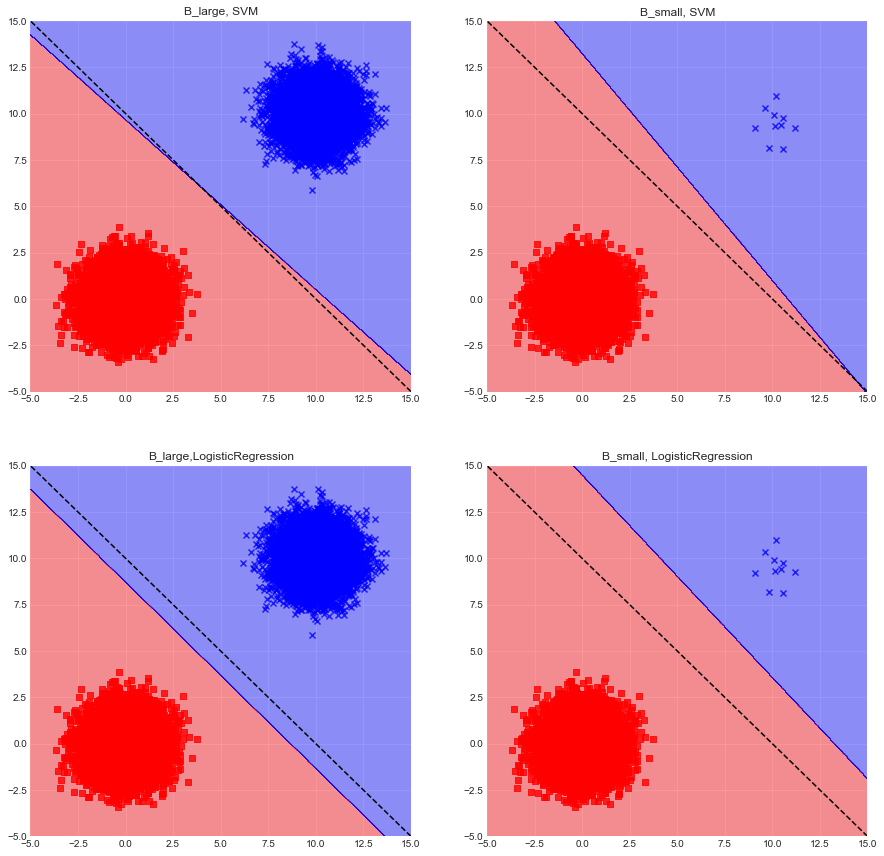

In [4]:
Bs = [B_large, B_small]
clfs = [svm.SVC(kernel="linear", C=1.0), LogisticRegression()]
titles = ["B_large, SVM", "B_small, SVM",
          "B_large,LogisticRegression","B_small, LogisticRegression"]

plt.figure(figsize=(15,15))

for i in range(4):
    B = Bs[i%2]
    X = np.concatenate((A, B))
    y = np.concatenate((np.array([0]*len(A)), np.array([1]*len(B))))

    clf = clfs[i//2]
    clf.fit(X,y)

    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plot_decision_regions(X, y, classifier=clf)
    plt.plot([15,-5],[-5,15],"--",c="black")

* 点線はAの中心 `(0,0)`とBの中心`(10,10)`から等間隔の線。(`(5,5)`を通る傾き`-1`の直線）

# 所感

* SVMとロジスティック回帰の結果は似たものとなる。
* 比較的ロジスティック回帰の方が、サンプルサイズを減らした際の決定境界の変化が大きくなった。
* SVMは決定境界に近いサンプル1つしかみていないため、サンプルの減少の影響を受けにくい（？）
    * TrainとTestでクラスの割合が大きく異なる場合でも、SVMの方が結果が安定する(?)